In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [ ]:
!unzip /content/drive/MyDrive/MealProject/dataset.zip -d '/content/drive/MyDrive/MealProject/'

Archive:  /content/drive/MyDrive/MealProject/dataset.zip
replace /content/drive/MyDrive/MealProject/dataset/classes.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:

!pip install clearml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 37.1 MB/s eta 0:00:00
  Attempting uninstall: pyjwt
    Found existing installation: PyJWT 2.9.0
    Uninstalling PyJWT-2.9.0:
      Successfully uninstalled PyJWT-2.9.0


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 879.0/879.0 kB 36.5 MB/s eta 0:00:00


In [ ]:
import torch
print("GPU available:", torch.cuda.is_available())
print("GPU name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU")


GPU available: True
GPU name: Tesla T4


In [ ]:
!yolo task=detect mode=train model=yolov8m.pt imgsz=416 data="/content/drive/MyDrive/MealProject/dataset/data.yaml" epochs=50 batch=80 device=0 name=/content/drive/MyDrive/MealProject/training_data

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/drive/MyDrive/MealProject/dataset/data.yaml, epochs=50, time=None, patience=100, batch=80, imgsz=416, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=training_data, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=T

In [ ]:
import gc
import tensorflow as tf

# Custom Callback To Include in Callbacks List At Training Time
class GarbageCollectorCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        gc.collect()

In [ ]:
from ultralytics import YOLO

model = YOLO("/content/drive/MyDrive/MealProject/training_data/weights/best.pt")
model.export(format="onnx", imgsz=[416,416])


Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.00GHz)
Model summary (fused): 218 layers, 25,861,183 parameters, 0 gradients, 78.8 GFLOPs

PyTorch: starting from '/content/drive/MyDrive/MealProject/training_data/weights/best.pt' with input shape (1, 3, 416, 416) BCHW and output shape(s) (1, 41, 3549) (49.6 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 262.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 kB 282.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.2/226.2 MB 258.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 244.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 194.1 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 15.9s, installed 3 packages: ['onnx>=1.12.0', 'onnxslim', 'onnxruntime-gpu']
requirements: ⚠️ Restart

'/content/drive/MyDrive/MealProject/training_data/weights/best.onnx'

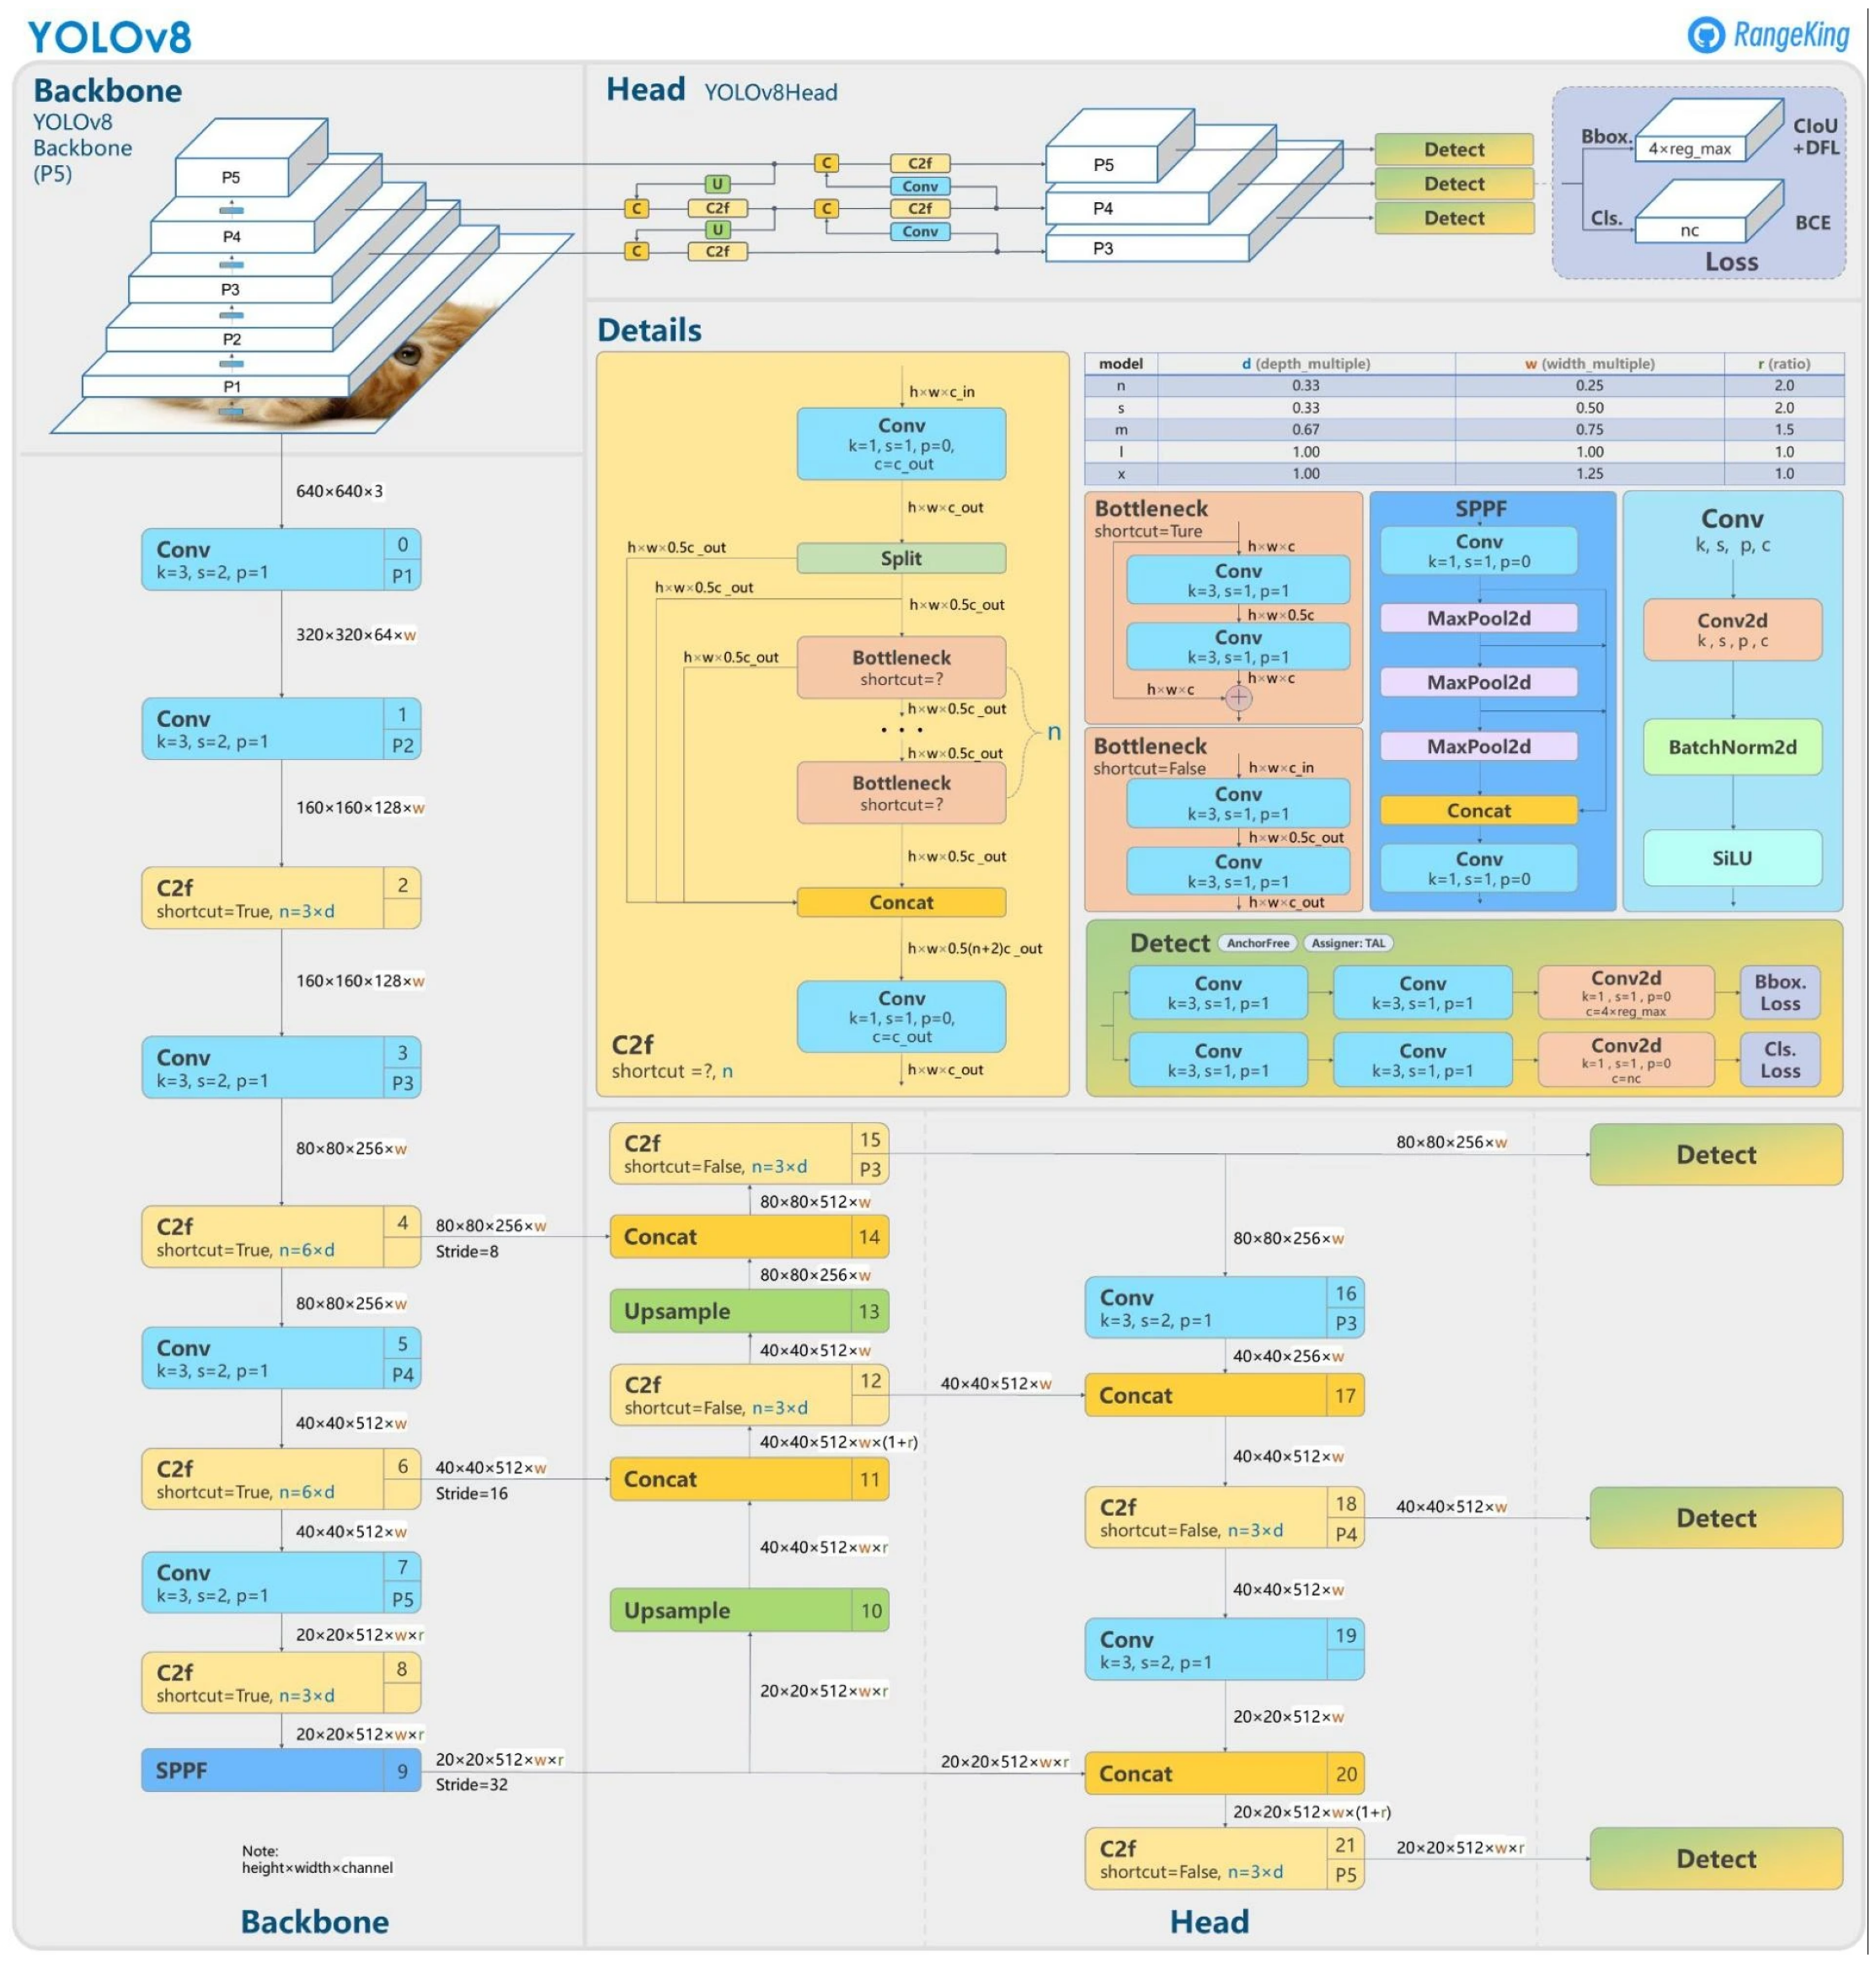

In [ ]:
import requests
from PIL import Image
import matplotlib.pyplot as plt
from io import BytesIO

# URL of the image you want to display
image_url = "https://images.prismic.io/encord/18732cf0-dd15-4c3d-94b5-401d7266c000_YOLOv8+Layout.webp"

# Download the image from the URL
response = requests.get(image_url)
image = Image.open(BytesIO(response.content))
plt.figure(figsize=(30, 30))  # You can adjust the size as needed

# Display the image in Colab using matplotlib.pyplot
plt.imshow(image)
plt.axis('off')
plt.show()


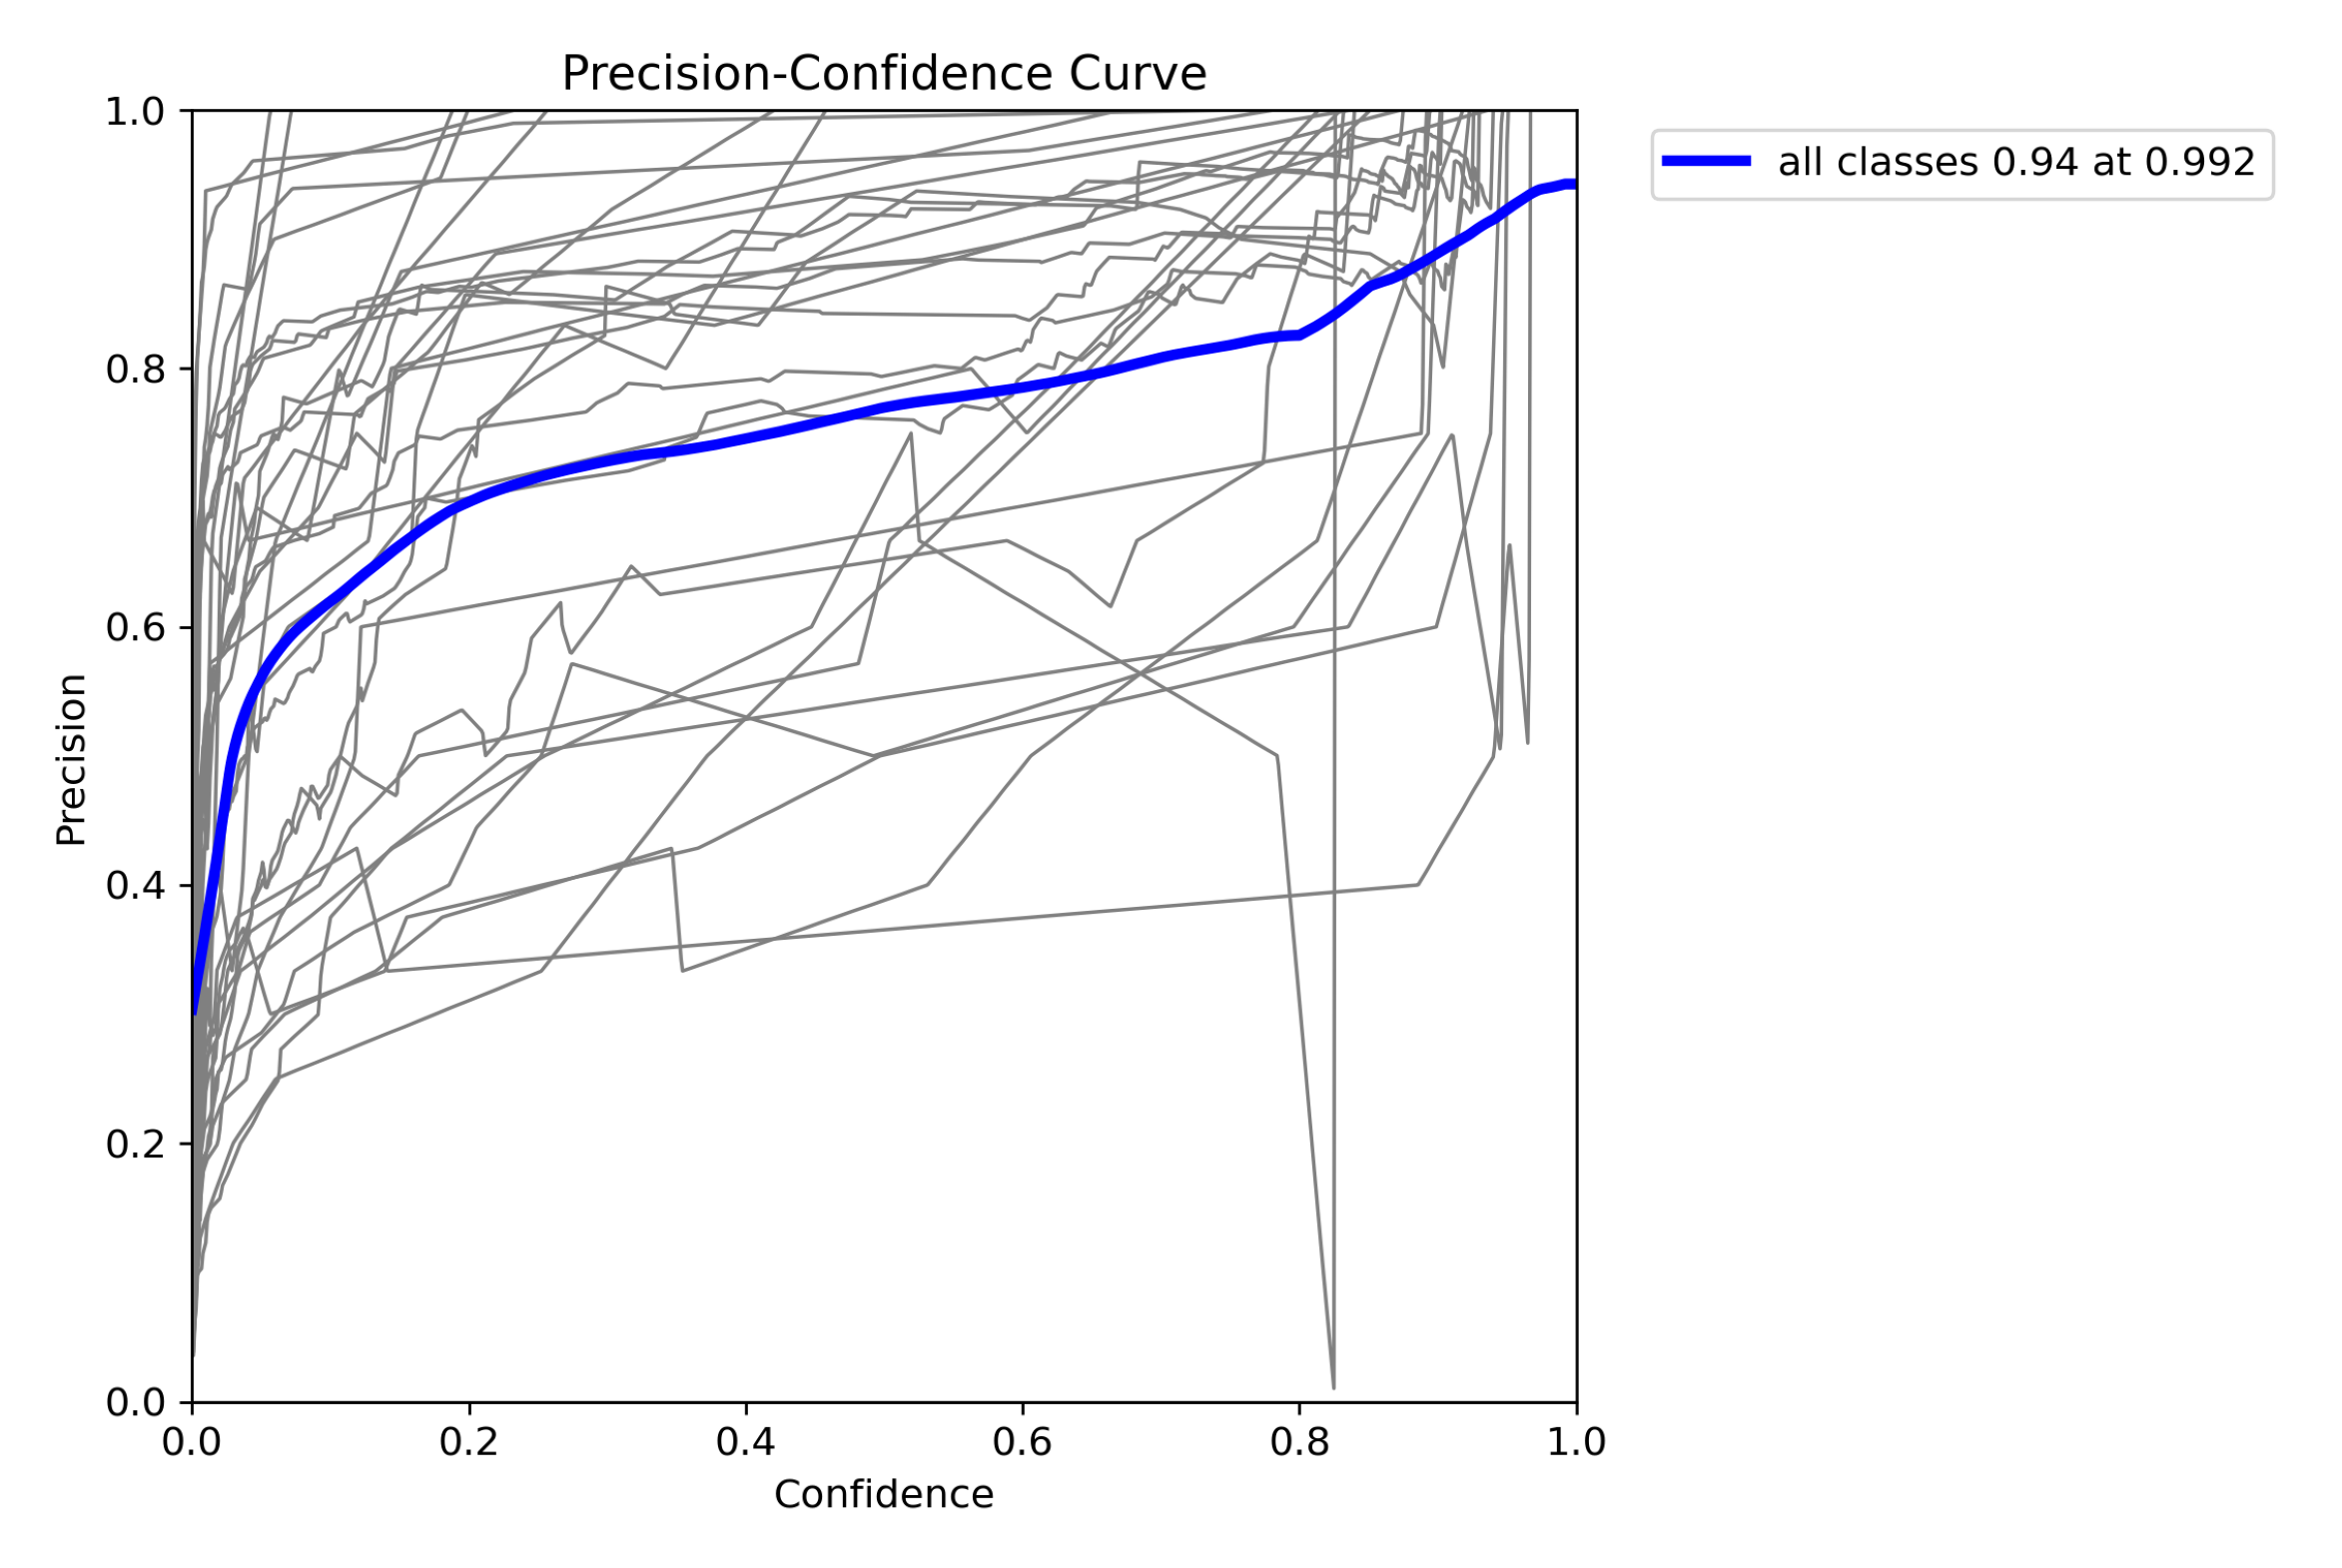

In [ ]:
image = Image.open("/content/drive/MyDrive/MealProject/training_data/P_curve.png")
plt.figure(figsize=(30, 30))  # You can adjust the size as needed

# Display the image in Colab using matplotlib.pyplot
plt.imshow(image)
plt.axis('off')
plt.show()


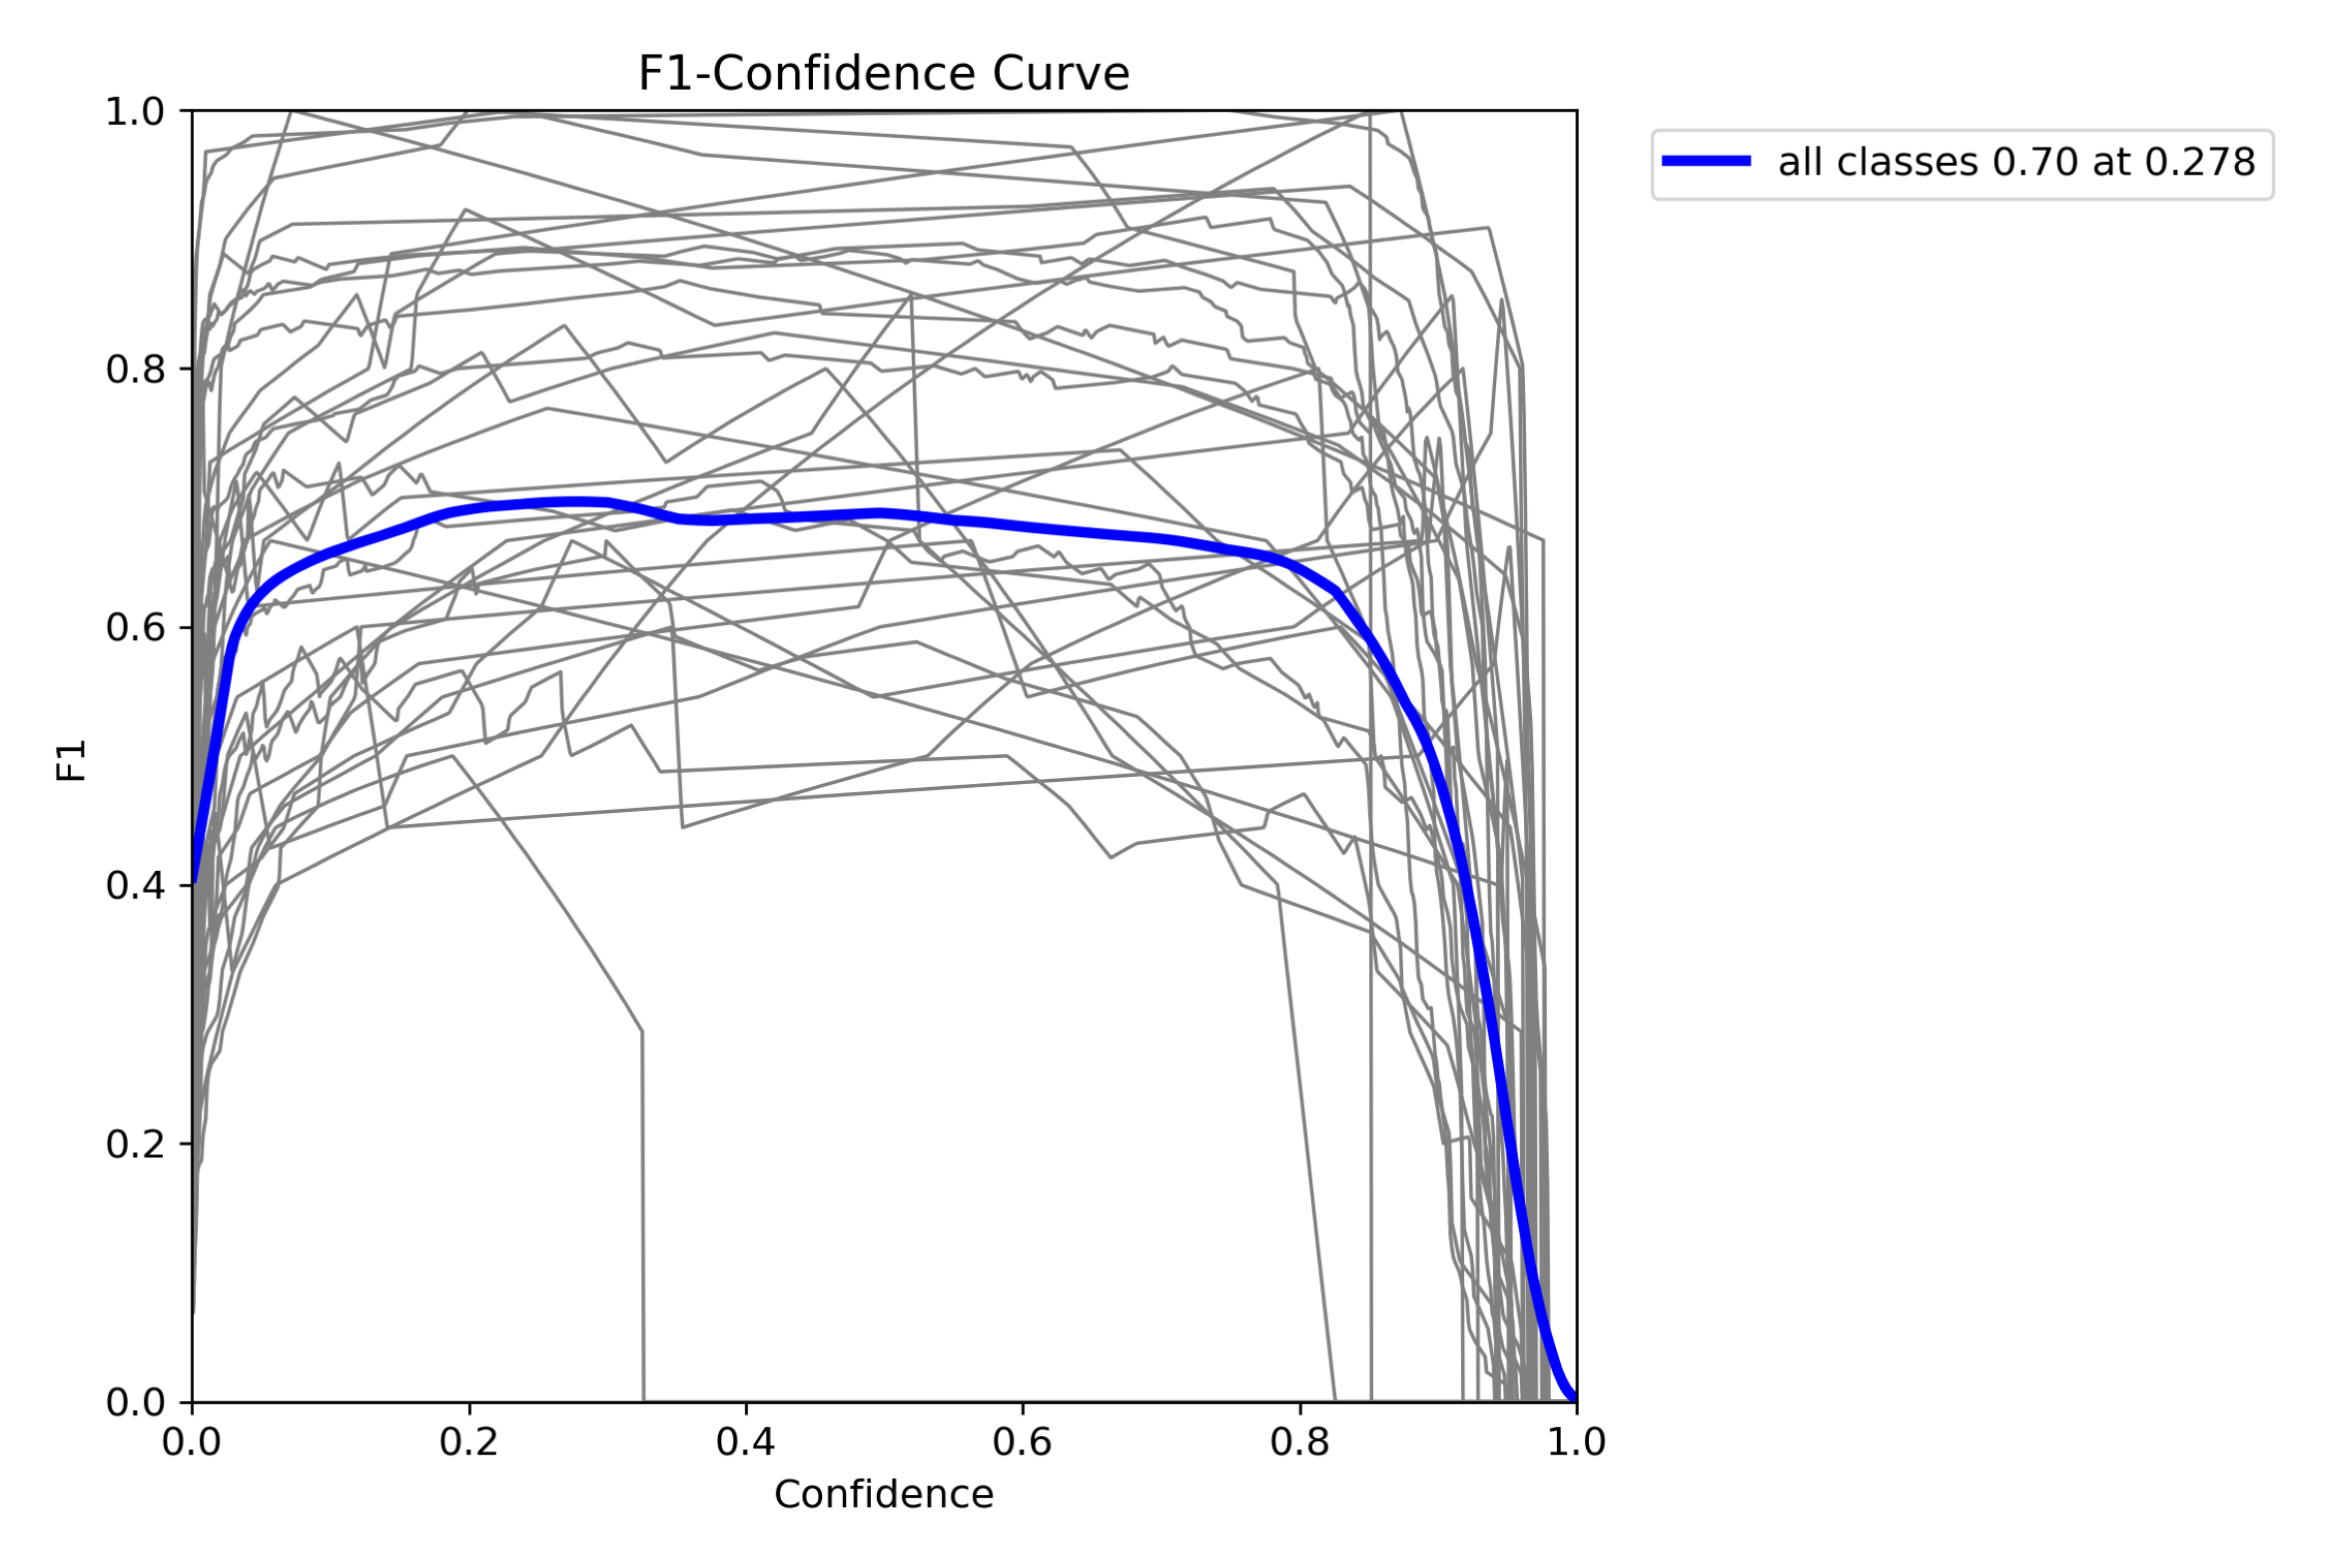

In [ ]:
image = Image.open("/content/drive/MyDrive/MealProject/training_data/F1_curve.png")
plt.figure(figsize=(30, 30))  # You can adjust the size as needed

# Display the image in Colab using matplotlib.pyplot
plt.imshow(image)
plt.axis('off')
plt.show()


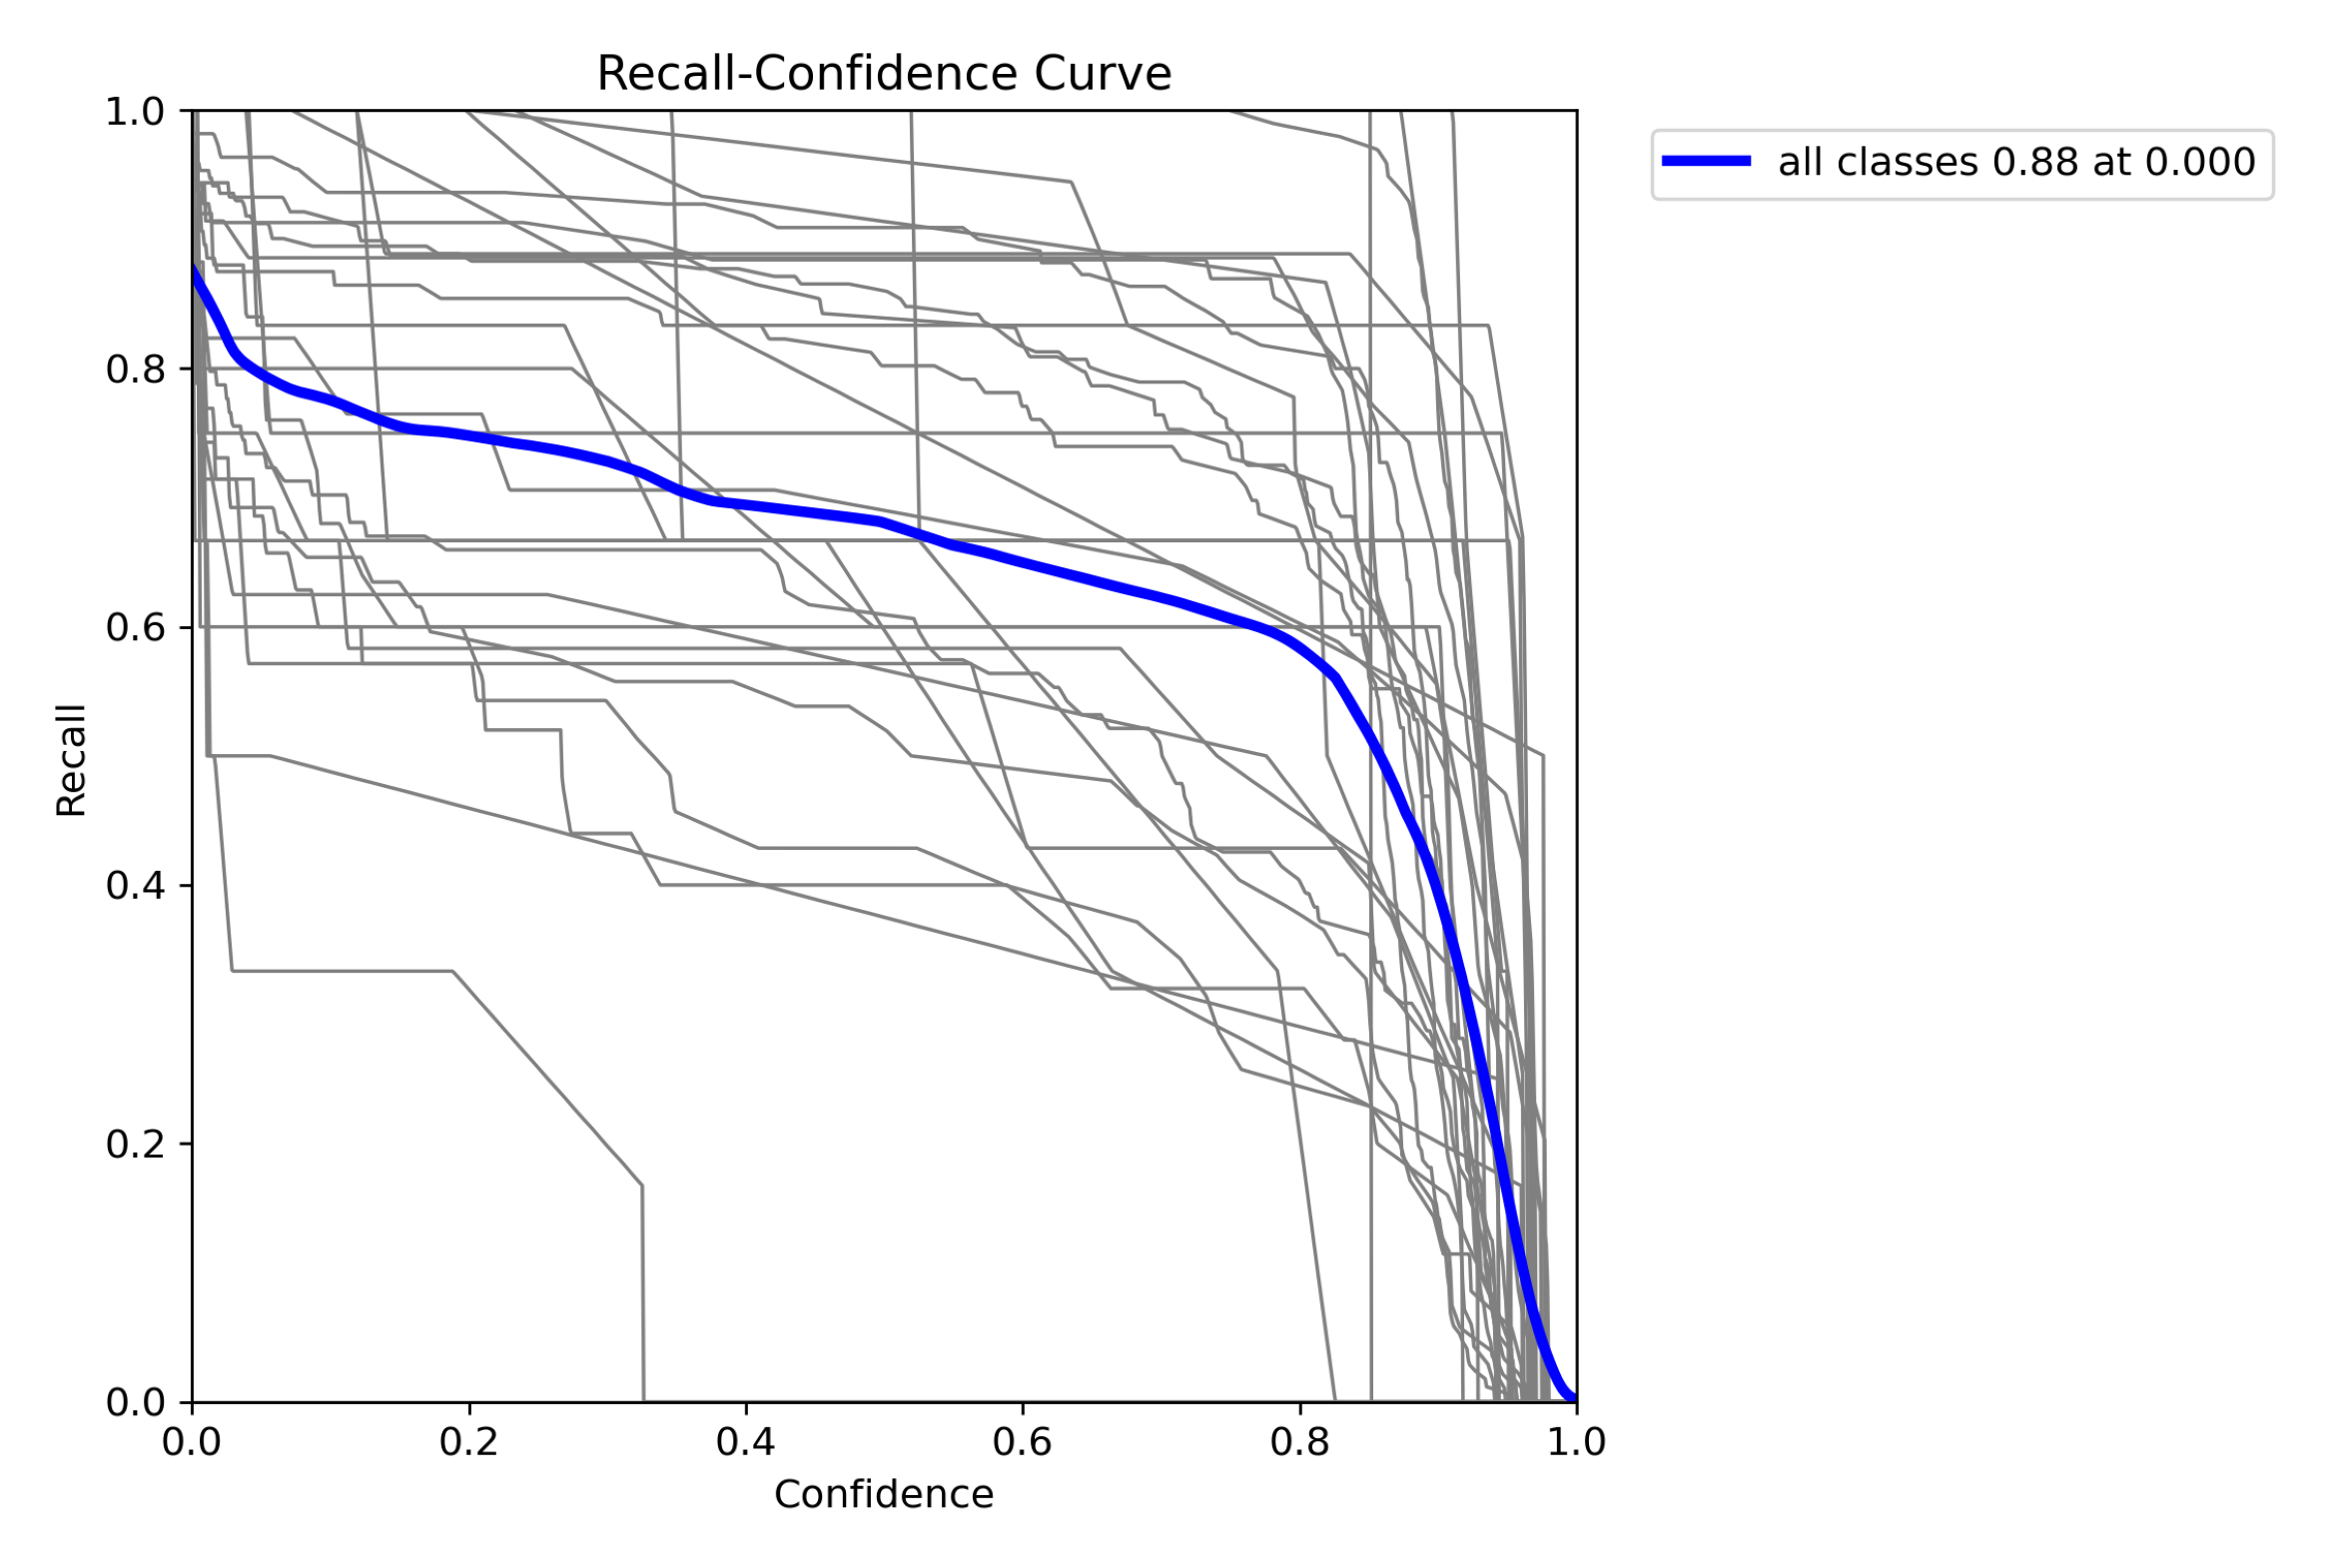

In [ ]:
image = Image.open("/content/drive/MyDrive/MealProject/training_data//R_curve.png")
plt.figure(figsize=(30, 30))  # You can adjust the size as needed

# Display the image in Colab using matplotlib.pyplot
plt.imshow(image)
plt.axis('off')
plt.show()


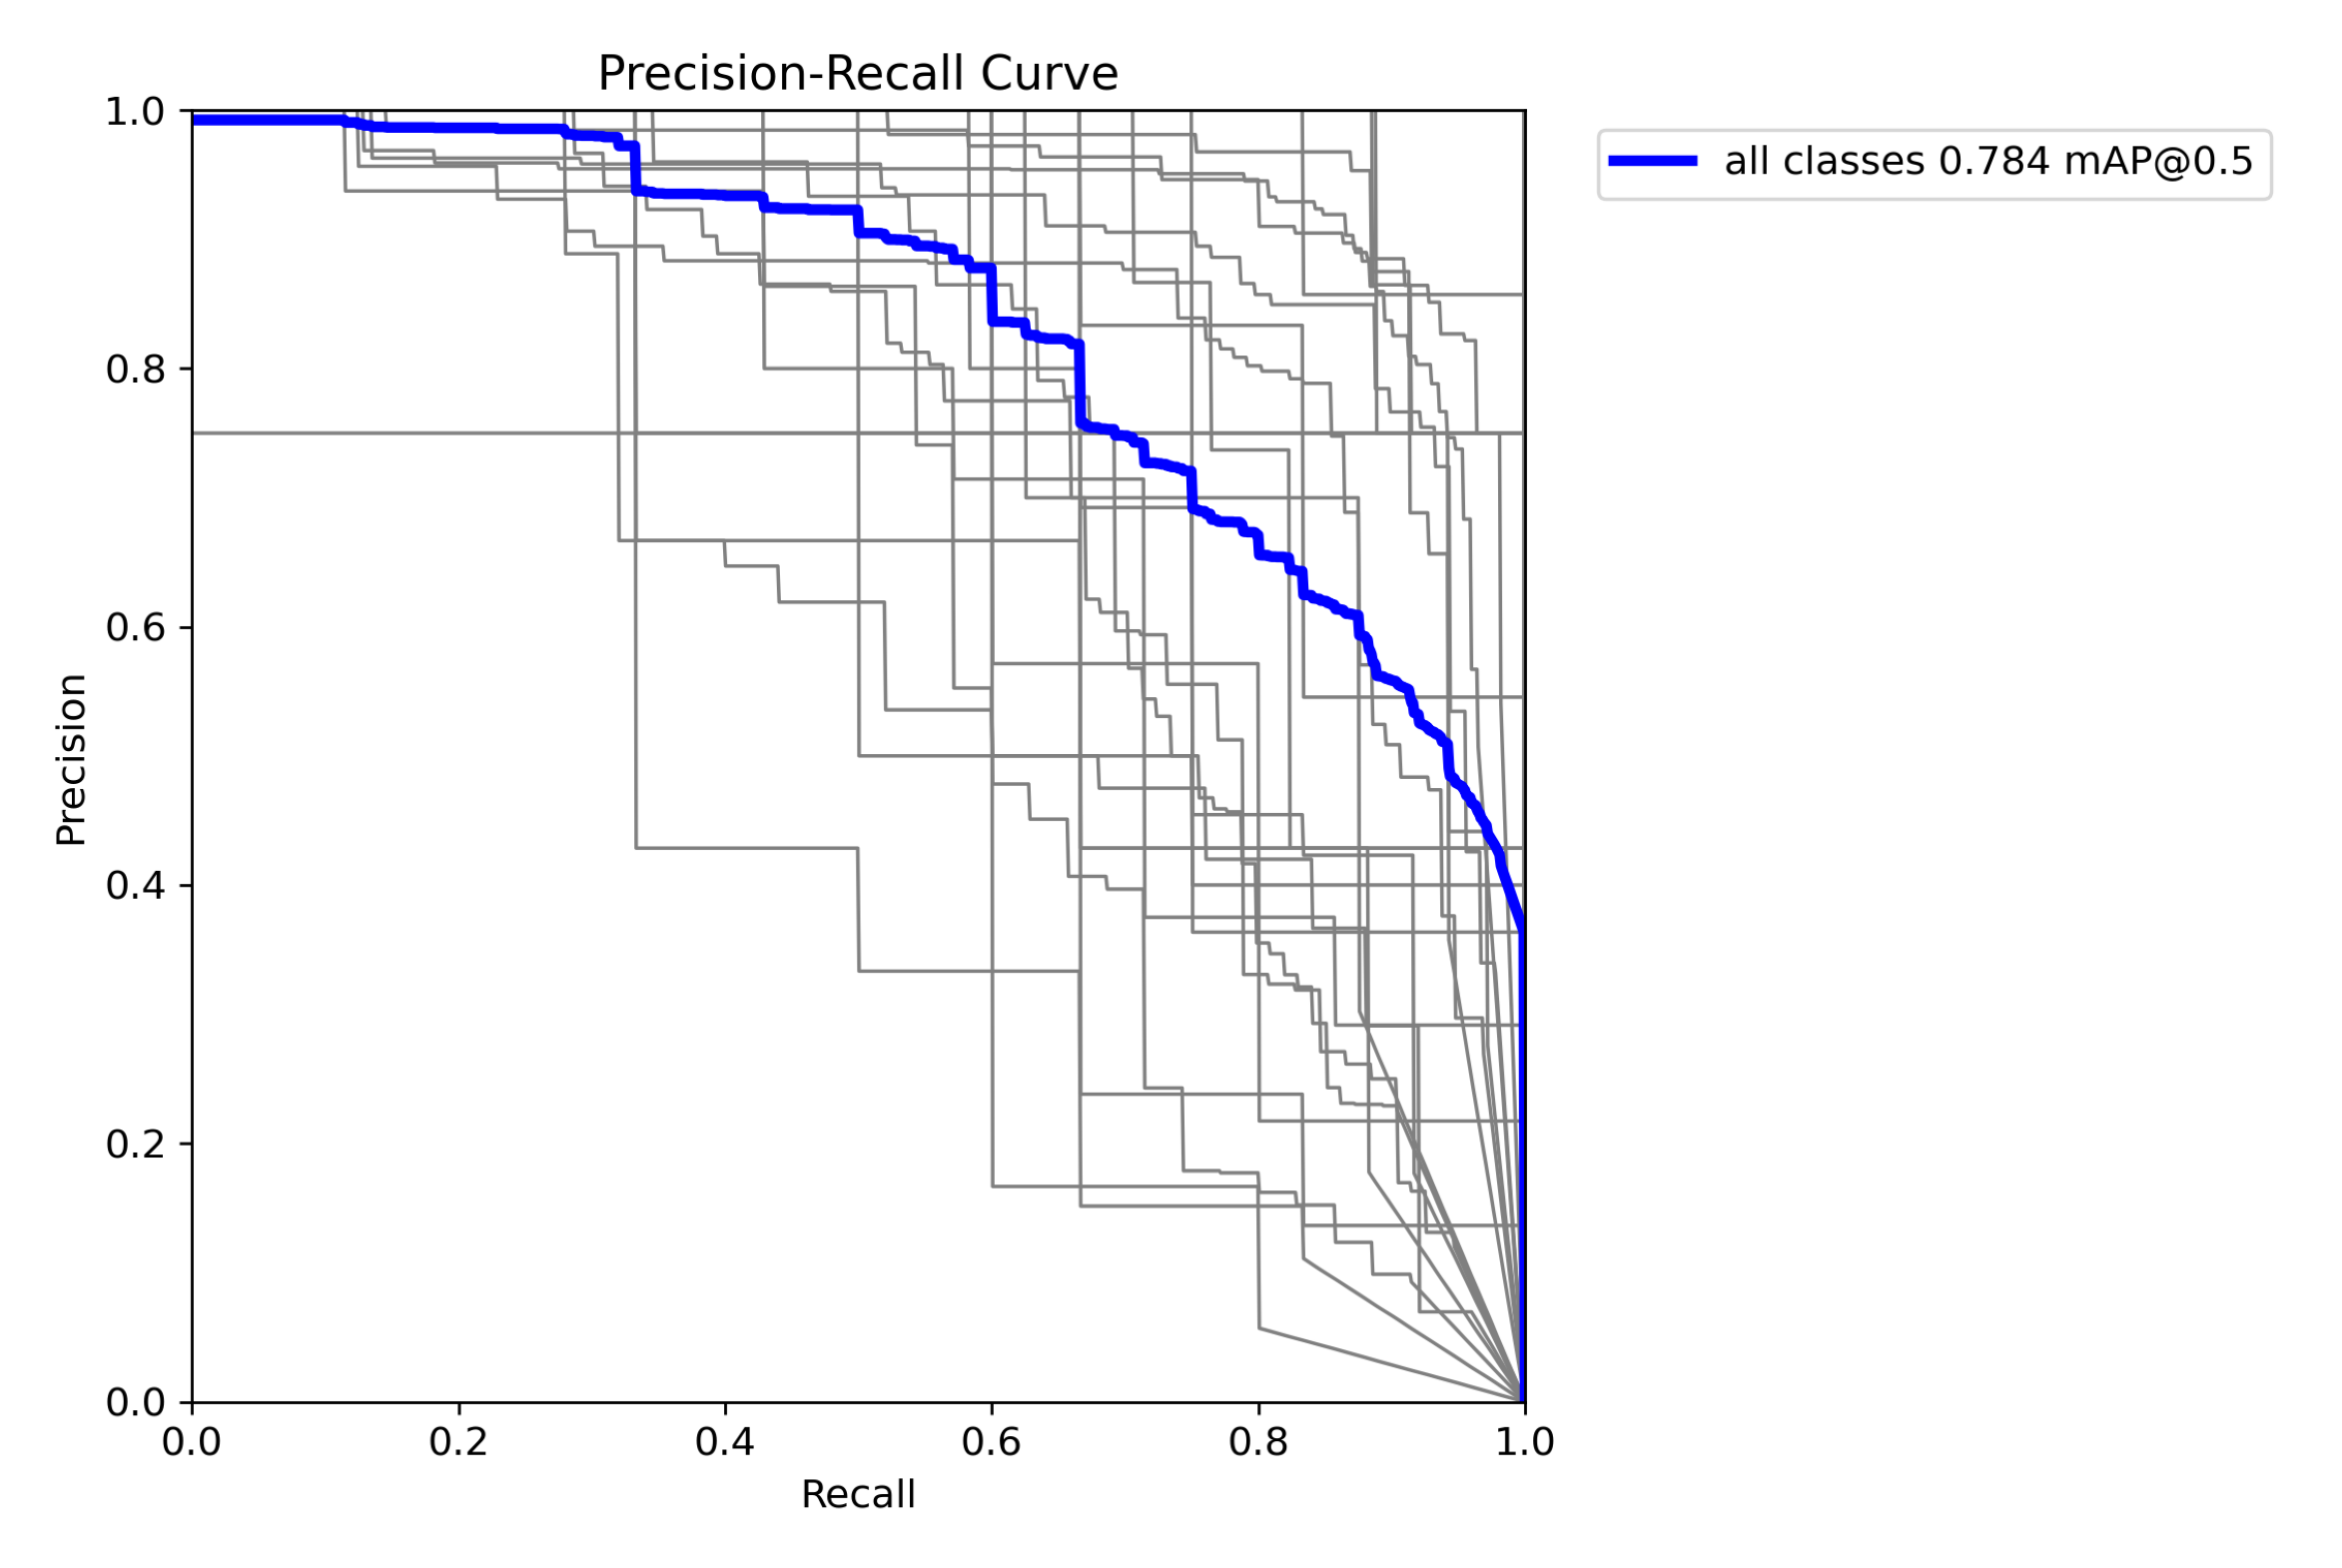

In [ ]:
image = Image.open("/content/drive/MyDrive/MealProject/training_data/PR_curve.png")
plt.figure(figsize=(30, 30))  # You can adjust the size as needed

# Display the image in Colab using matplotlib.pyplot
plt.imshow(image)
plt.axis('off')
plt.show()


In [ ]:
1